In [ ]:
! pip install -r requirements.txt

In [ ]:
import gymnasium as gym
import os
import matplotlib.pyplot as plt
import json # for dumping debug data
import time # for benchmarking
import numpy as np
from ddqn_torch import DoubleQAgent

LEARN_EVERY = 4
def train_agent(n_episodes=2000, load_model=None, best=0, lr = 0.0001, epsilon = 1.0, epsilon_end = 0.05):
    print("Training a DDQN agent on {} episodes. Pretrained model = {}".format(n_episodes,load_model))
    env = gym.make(
            "LunarLander-v2",
            continuous = False,
            gravity = -10.0,
            enable_wind = False,
            wind_power = 15.0,
            turbulence_power = 1.5,
        )
    agent = DoubleQAgent(gamma=0.95, epsilon=epsilon, epsilon_dec=0.995, lr=lr, mem_size=200000, batch_size=256, epsilon_end=epsilon_end)
    if load_model:
        agent.load_saved_model("models/"+load_model)
        
    start_states = []
    scores = []
    eps_history = []
    start = time.time()
    best_avg = best
    for i in range(n_episodes):
        terminated = False
        truncated = False
        score = 0
        state = env.reset()[0]
        start_states.append(state)
        steps = 0
        while not (terminated or truncated):
            action = agent.choose_action(state)
            new_state, reward, terminated, truncated, info = env.step(action)
            agent.save(state, action, reward, new_state, terminated)
            state = new_state
            if steps > 0 and steps % LEARN_EVERY == 0:
                agent.learn()
            steps += 1
            score += reward
            
        eps_history.append(agent.epsilon)
        scores.append(score)
        avg_score = np.mean(scores[max(0, i-100):])

        if (i+1) % 10 == 0 and i > 0:
            # Report expected time to finish the training
            print('Episode {} in {:.2f} min. Expected total time for {} episodes: {:.0f} min. [{:.2f}/{:.2f}]'.format((i+1), 
                                                                                                                      (time.time() - start)/60, 

        if avg_score > best_avg and i > 100:
            best_avg = avg_score
            print(">>> NEW BEST AVERAGE:",best_avg)
            agent.save_model(f'models/ddqn_torch_model_{round(best_avg,2)}.h5')
            
        # if (i+1) % 100 == 0 and i > 0:
            # Save the model every N-th step just in case
            # 
            # with open("ddqn_torch_dqn_scores_{}.json".format(int(time.time())), "w") as fp:
            #     json.dump(scores, fp)
            # with open("ddqn_torch_eps_history_{}.json".format(int(time.time())), "w") as fp:
            #     json.dump(eps_history, fp)
                
    return agent, scores, start_states

In [20]:
# Uncomment to train
import matplotlib.pyplot as plt
agent, scores, start_states = train_agent(n_episodes=10000, lr = 0.001, epsilon = 0.005, epsilon_end = 0.005)

Training a DDQN agent on 10000 episodes. Pretrained model = None
Episode 10 in 0.03 min. Expected total time for 10000 episodes: 31 min. [-411.73/-318.19]
Episode 20 in 0.23 min. Expected total time for 10000 episodes: 119 min. [-233.95/-267.18]
Episode 30 in 0.48 min. Expected total time for 10000 episodes: 166 min. [-179.81/-239.93]
Episode 40 in 0.66 min. Expected total time for 10000 episodes: 168 min. [-167.57/-222.65]
Episode 50 in 0.96 min. Expected total time for 10000 episodes: 196 min. [-105.13/-199.55]
Episode 60 in 1.26 min. Expected total time for 10000 episodes: 214 min. [-167.13/-195.13]
Episode 70 in 1.65 min. Expected total time for 10000 episodes: 238 min. [-154.70/-183.97]


KeyboardInterrupt: 

In [15]:
n_latest = 1000
print(np.array(start_states)[:,:2].shape)
plt.scatter(*np.array(np.array(start_states)[:,:2][-n_latest:]).T, c=scores[-n_latest:], cmap='RdYlGn')
plt.colorbar(label='Score')
plt.show()

NameError: name 'start_states' is not defined

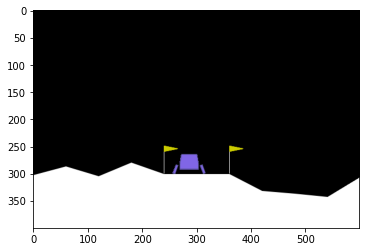

In [3]:
# Visualize the model
import gymnasium as gym
import os
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output
from ddqn_torch import DoubleQAgent

# Set path to the model to visualize
model_to_animate = 'stats/m6.h5'

def animate_model(name, atype='single'):
    env = gym.make("LunarLander-v2", render_mode="rgb_array")
    agent = DoubleQAgent(gamma=0.99, epsilon=0.0, lr=0.0005, mem_size=200000, batch_size=64, epsilon_end=0.01)
    agent.load_saved_model(name)
    state, info = env.reset(seed=12)
    for _ in range(5):
        terminated = False
        truncated = False
        while not (terminated or truncated):
            action = agent.choose_action(state)
            new_state, reward, terminated, truncated, info = env.step(action)
            state = new_state
            clear_output(wait=True)
            plt.imshow( env.render() )
            plt.show()
        state = env.reset()[0]
    env.close()

animate_model(model_to_animate, atype='double')









  0%|          | 0/20 [00:07<?, ?it/s]


KeyboardInterrupt: 